# TensorFlow Use Case
## A naval mine identifier
During times of war, the navy releases floating mines that explode in contact with enemy ships.
This deep learning model identifies whether an object in the ocean (path of the ship) is a rock or a mine.

### 1) Loading and manipulating data

In [14]:
""" Necessary libraries """
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [15]:
def read_dataset():
    df = pd.read_csv('sonar.csv')
    
    X = df[df.columns[:60]].values
    y = df[df.columns[60]]
    
    encoder = LabelEncoder()
    encoder.fit(y)
    y = encoder.transform(y)
    Y = one_hot_encode(y)
    print(X.shape)
    return (X, Y)

def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_unique_labels))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

# Read the dataset
X, Y = read_dataset()

# Shuffle the dataset to mix up the rows
X, Y = shuffle(X, Y, random_state=1)

# convert dataset intro train and test part
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.20, random_state=415)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)

(207, 60)
(165, 60)
(165, 2)
(42, 60)


### 2) Creating, training and storing prediction model

In [16]:
# Important parameters for working with tensors
learning_rate = 0.3
training_epochs = 1000

cost_history = np.empty(shape=[1], dtype=float)
n_dim = X.shape[1]
n_class = 2
model_path = '/Users/nishitjain/Documents/Github/TensorflowTutorial/NMI'


n_hidden_1 = 60
n_hidden_2 = 60
n_hidden_3 = 60
n_hidden_4 = 60

x = tf.placeholder(tf.float32, [None, n_dim])
w = tf.Variable(tf.zeros([n_dim, n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32, [None, n_class])

In [17]:
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}

biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

init = tf.global_variables_initializer()

# To save the model
saver = tf.train.Saver()

# Call your defined model
y = multilayer_perceptron(x, weights, biases)

# Cost function and optimizer
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess = tf.Session()
sess.run(init)

mse_history = []
accuracy_history = []

for epoch in range(training_epochs):
    sess.run(training_step, feed_dict={x: train_x, y_: train_y})
    cost = sess.run(cost_function, feed_dict={x: train_x, y_: train_y})
    cost_history = np.append(cost_history, cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    pred_y = sess.run(y, feed_dict={x: test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_ = sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy, feed_dict={x: train_x, y_: train_y}))
    accuracy_history.append(accuracy)
    
    print('epoch:', epoch, '-', 'cost:', cost, '- MSE:', mse_, '- Train accuracy:', accuracy)

save_path = saver.save(sess, model_path)
print('Model saved in file: %s' % save_path)

epoch: 0 - cost: 65.92106 - MSE: 5254.630870356237 - Train accuracy: 0.54545456
epoch: 1 - cost: 7.7237625 - MSE: 69.97178086493201 - Train accuracy: 0.45454547
epoch: 2 - cost: 14.072752 - MSE: 263.25139468212296 - Train accuracy: 0.54545456
epoch: 3 - cost: 0.82843554 - MSE: 11.398906025622608 - Train accuracy: 0.46666667
epoch: 4 - cost: 0.6680668 - MSE: 13.141387284340448 - Train accuracy: 0.56969696
epoch: 5 - cost: 1.1038367 - MSE: 15.266192381416843 - Train accuracy: 0.45454547
epoch: 6 - cost: 2.8086429 - MSE: 22.019522744605315 - Train accuracy: 0.54545456
epoch: 7 - cost: 0.7318745 - MSE: 3.9180808697104266 - Train accuracy: 0.54545456
epoch: 8 - cost: 0.6981388 - MSE: 4.6887105254254795 - Train accuracy: 0.47878787
epoch: 9 - cost: 0.68825835 - MSE: 4.501902658337862 - Train accuracy: 0.53333336
epoch: 10 - cost: 0.68056995 - MSE: 4.536778975788533 - Train accuracy: 0.54545456
epoch: 11 - cost: 0.6741089 - MSE: 4.576703681262076 - Train accuracy: 0.55151516
epoch: 12 - cost:

epoch: 100 - cost: 0.28485245 - MSE: 3.532148763563866 - Train accuracy: 0.9030303
epoch: 101 - cost: 0.4354954 - MSE: 3.2731096787355023 - Train accuracy: 0.8060606
epoch: 102 - cost: 0.7804428 - MSE: 4.818708547561123 - Train accuracy: 0.6242424
epoch: 103 - cost: 0.7107421 - MSE: 2.677154502955994 - Train accuracy: 0.6181818
epoch: 104 - cost: 0.40008911 - MSE: 1.7173321808149742 - Train accuracy: 0.8363636
epoch: 105 - cost: 0.3401386 - MSE: 1.9314606528867757 - Train accuracy: 0.8606061
epoch: 106 - cost: 0.30382666 - MSE: 2.33369724335638 - Train accuracy: 0.93333334
epoch: 107 - cost: 0.27805588 - MSE: 2.501713010384649 - Train accuracy: 0.90909094
epoch: 108 - cost: 0.26985806 - MSE: 2.9626767249900006 - Train accuracy: 0.91515154
epoch: 109 - cost: 0.29181966 - MSE: 2.832444957054786 - Train accuracy: 0.8545455
epoch: 110 - cost: 0.37658453 - MSE: 3.5042544255999766 - Train accuracy: 0.8060606
epoch: 111 - cost: 0.5526183 - MSE: 3.2249789490992278 - Train accuracy: 0.73939395


epoch: 199 - cost: 0.09582642 - MSE: 6.117283436035147 - Train accuracy: 0.9818182
epoch: 200 - cost: 0.09863687 - MSE: 5.947881399159133 - Train accuracy: 0.9818182
epoch: 201 - cost: 0.09795361 - MSE: 6.679432056413034 - Train accuracy: 0.9757576
epoch: 202 - cost: 0.10992983 - MSE: 5.992911864959099 - Train accuracy: 0.96363634
epoch: 203 - cost: 0.1353674 - MSE: 7.959000242525723 - Train accuracy: 0.96363634
epoch: 204 - cost: 0.35793224 - MSE: 6.380469860442262 - Train accuracy: 0.8424242
epoch: 205 - cost: 1.2078763 - MSE: 14.793073978682159 - Train accuracy: 0.56363636
epoch: 206 - cost: 1.4733706 - MSE: 7.080791857930417 - Train accuracy: 0.54545456
epoch: 207 - cost: 0.85442513 - MSE: 1.179929598866955 - Train accuracy: 0.5151515
epoch: 208 - cost: 0.6452658 - MSE: 1.3571404971587353 - Train accuracy: 0.630303
epoch: 209 - cost: 0.45690525 - MSE: 1.0961375317948374 - Train accuracy: 0.8060606
epoch: 210 - cost: 0.3988711 - MSE: 1.1452852949346037 - Train accuracy: 0.8727273
ep

epoch: 298 - cost: 0.05047545 - MSE: 6.319732211232612 - Train accuracy: 0.9939394
epoch: 299 - cost: 0.04840111 - MSE: 6.519225029447245 - Train accuracy: 0.9939394
epoch: 300 - cost: 0.046098944 - MSE: 6.659308729934356 - Train accuracy: 0.9939394
epoch: 301 - cost: 0.044077273 - MSE: 6.922841987909446 - Train accuracy: 0.9939394
epoch: 302 - cost: 0.042086415 - MSE: 7.0033022221830485 - Train accuracy: 0.9939394
epoch: 303 - cost: 0.040769145 - MSE: 7.251788546648808 - Train accuracy: 0.9939394
epoch: 304 - cost: 0.039829865 - MSE: 7.288881004644436 - Train accuracy: 1.0
epoch: 305 - cost: 0.039724678 - MSE: 7.484172599917036 - Train accuracy: 0.9939394
epoch: 306 - cost: 0.039064996 - MSE: 7.5121238487979065 - Train accuracy: 1.0
epoch: 307 - cost: 0.041119836 - MSE: 7.765025684614926 - Train accuracy: 0.9939394
epoch: 308 - cost: 0.040382925 - MSE: 7.7006039240835555 - Train accuracy: 1.0
epoch: 309 - cost: 0.043696593 - MSE: 7.9870977741448215 - Train accuracy: 0.9939394
epoch: 3

epoch: 397 - cost: 0.19758032 - MSE: 5.563367335128222 - Train accuracy: 0.93333334
epoch: 398 - cost: 0.19587436 - MSE: 5.2925252174723765 - Train accuracy: 0.93333334
epoch: 399 - cost: 0.28327748 - MSE: 8.273298934539277 - Train accuracy: 0.8848485
epoch: 400 - cost: 0.67831707 - MSE: 4.77945706115366 - Train accuracy: 0.7030303
epoch: 401 - cost: 0.621618 - MSE: 8.091691119313406 - Train accuracy: 0.6727273
epoch: 402 - cost: 0.42054692 - MSE: 2.7593315690262417 - Train accuracy: 0.7878788
epoch: 403 - cost: 0.30032456 - MSE: 3.1570137942815846 - Train accuracy: 0.8909091
epoch: 404 - cost: 0.24438325 - MSE: 4.099278875042121 - Train accuracy: 0.94545454
epoch: 405 - cost: 0.20950137 - MSE: 4.891545215664872 - Train accuracy: 0.95757574
epoch: 406 - cost: 0.18391585 - MSE: 5.214158992158993 - Train accuracy: 0.969697
epoch: 407 - cost: 0.16282031 - MSE: 5.841307562458331 - Train accuracy: 0.96363634
epoch: 408 - cost: 0.14651003 - MSE: 6.256573933643562 - Train accuracy: 0.9757576


epoch: 496 - cost: 0.44226018 - MSE: 1.1601232820578062 - Train accuracy: 0.8
epoch: 497 - cost: 0.40730923 - MSE: 1.2976909376738683 - Train accuracy: 0.8363636
epoch: 498 - cost: 0.37308764 - MSE: 1.5098001734960873 - Train accuracy: 0.8545455
epoch: 499 - cost: 0.33664933 - MSE: 1.8749147813159233 - Train accuracy: 0.8666667
epoch: 500 - cost: 0.30653563 - MSE: 2.146125109619295 - Train accuracy: 0.9030303
epoch: 501 - cost: 0.28300595 - MSE: 2.4058237123040223 - Train accuracy: 0.91515154
epoch: 502 - cost: 0.26301908 - MSE: 2.619143233358487 - Train accuracy: 0.93333334
epoch: 503 - cost: 0.24612124 - MSE: 2.9367989220050212 - Train accuracy: 0.94545454
epoch: 504 - cost: 0.2314854 - MSE: 3.073021382473703 - Train accuracy: 0.95151514
epoch: 505 - cost: 0.21804366 - MSE: 3.422533285799731 - Train accuracy: 0.95151514
epoch: 506 - cost: 0.20411763 - MSE: 3.5780229429849366 - Train accuracy: 0.95151514
epoch: 507 - cost: 0.19199657 - MSE: 3.986413654492107 - Train accuracy: 0.951515

epoch: 598 - cost: 0.009598205 - MSE: 15.122567836664919 - Train accuracy: 1.0
epoch: 599 - cost: 0.009451417 - MSE: 15.226789839536101 - Train accuracy: 1.0
epoch: 600 - cost: 0.009311311 - MSE: 15.288605044017727 - Train accuracy: 1.0
epoch: 601 - cost: 0.009179259 - MSE: 15.365760686742078 - Train accuracy: 1.0
epoch: 602 - cost: 0.009047113 - MSE: 15.42834225427583 - Train accuracy: 1.0
epoch: 603 - cost: 0.008921103 - MSE: 15.480063072871763 - Train accuracy: 1.0
epoch: 604 - cost: 0.008797244 - MSE: 15.555152433029557 - Train accuracy: 1.0
epoch: 605 - cost: 0.008681031 - MSE: 15.588775778385441 - Train accuracy: 1.0
epoch: 606 - cost: 0.008562328 - MSE: 15.676723738712868 - Train accuracy: 1.0
epoch: 607 - cost: 0.008451768 - MSE: 15.729108189563574 - Train accuracy: 1.0
epoch: 608 - cost: 0.008343622 - MSE: 15.799311340169996 - Train accuracy: 1.0
epoch: 609 - cost: 0.008238549 - MSE: 15.851126547630551 - Train accuracy: 1.0
epoch: 610 - cost: 0.008140279 - MSE: 15.921664801225

epoch: 702 - cost: 0.0037546451 - MSE: 19.915312093398807 - Train accuracy: 1.0
epoch: 703 - cost: 0.003732188 - MSE: 19.954390579557398 - Train accuracy: 1.0
epoch: 704 - cost: 0.0037096692 - MSE: 19.984241623448447 - Train accuracy: 1.0
epoch: 705 - cost: 0.0036872886 - MSE: 20.0138274328235 - Train accuracy: 1.0
epoch: 706 - cost: 0.003665448 - MSE: 20.043847279842257 - Train accuracy: 1.0
epoch: 707 - cost: 0.0036441907 - MSE: 20.08260933158213 - Train accuracy: 1.0
epoch: 708 - cost: 0.0036225186 - MSE: 20.111565311856566 - Train accuracy: 1.0
epoch: 709 - cost: 0.0036011476 - MSE: 20.14095402669627 - Train accuracy: 1.0
epoch: 710 - cost: 0.0035804256 - MSE: 20.170040934739784 - Train accuracy: 1.0
epoch: 711 - cost: 0.0035599102 - MSE: 20.20629076070605 - Train accuracy: 1.0
epoch: 712 - cost: 0.0035395047 - MSE: 20.23374693137193 - Train accuracy: 1.0
epoch: 713 - cost: 0.0035190457 - MSE: 20.260637961826124 - Train accuracy: 1.0
epoch: 714 - cost: 0.0034987794 - MSE: 20.289182

epoch: 806 - cost: 0.002272554 - MSE: 22.575821820096778 - Train accuracy: 1.0
epoch: 807 - cost: 0.0022634948 - MSE: 22.595232427234414 - Train accuracy: 1.0
epoch: 808 - cost: 0.0022544255 - MSE: 22.622541182844973 - Train accuracy: 1.0
epoch: 809 - cost: 0.0022454418 - MSE: 22.643330414916942 - Train accuracy: 1.0
epoch: 810 - cost: 0.0022364892 - MSE: 22.662738984854958 - Train accuracy: 1.0
epoch: 811 - cost: 0.0022275574 - MSE: 22.684016100556875 - Train accuracy: 1.0
epoch: 812 - cost: 0.0022187736 - MSE: 22.704549167046643 - Train accuracy: 1.0
epoch: 813 - cost: 0.0022100671 - MSE: 22.72433869142133 - Train accuracy: 1.0
epoch: 814 - cost: 0.0022014675 - MSE: 22.749441222306636 - Train accuracy: 1.0
epoch: 815 - cost: 0.0021928393 - MSE: 22.769490731965657 - Train accuracy: 1.0
epoch: 816 - cost: 0.0021842471 - MSE: 22.790116321615514 - Train accuracy: 1.0
epoch: 817 - cost: 0.0021757854 - MSE: 22.8106931944858 - Train accuracy: 1.0
epoch: 818 - cost: 0.0021673196 - MSE: 22.83

epoch: 909 - cost: 0.0015932589 - MSE: 24.50449359457826 - Train accuracy: 1.0
epoch: 910 - cost: 0.0015884117 - MSE: 24.521004379418173 - Train accuracy: 1.0
epoch: 911 - cost: 0.0015835958 - MSE: 24.538205728261335 - Train accuracy: 1.0
epoch: 912 - cost: 0.0015788468 - MSE: 24.55472521048485 - Train accuracy: 1.0
epoch: 913 - cost: 0.001574079 - MSE: 24.57105101948674 - Train accuracy: 1.0
epoch: 914 - cost: 0.0015693498 - MSE: 24.588089823071545 - Train accuracy: 1.0
epoch: 915 - cost: 0.0015646692 - MSE: 24.60448260436966 - Train accuracy: 1.0
epoch: 916 - cost: 0.0015600524 - MSE: 24.624603055822067 - Train accuracy: 1.0
epoch: 917 - cost: 0.0015553947 - MSE: 24.64135713610055 - Train accuracy: 1.0
epoch: 918 - cost: 0.001550781 - MSE: 24.657766058227338 - Train accuracy: 1.0
epoch: 919 - cost: 0.0015462136 - MSE: 24.674453392419565 - Train accuracy: 1.0
epoch: 920 - cost: 0.0015416465 - MSE: 24.689979103394318 - Train accuracy: 1.0
epoch: 921 - cost: 0.0015371029 - MSE: 24.70635

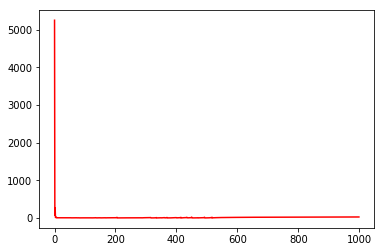

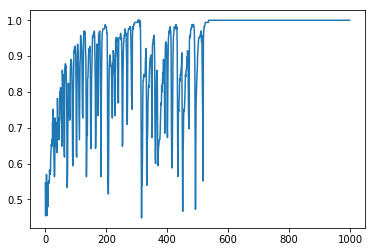

In [18]:
plt.plot(mse_history, 'r')
plt.show()
plt.plot(accuracy_history)
plt.show()

In [19]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test Accuracy:', (sess.run(accuracy, feed_dict={x: test_x, y_: test_y})))

Test Accuracy: 0.88095236


In [20]:
pred_y = sess.run(y, feed_dict={x: test_x})
mse = tf.reduce_mean(tf.square(pred_y - test_y))
print('MSE: %.4f' % sess.run(mse))

MSE: 25.8683
